In [1]:
import os
from glob import glob
import librosa
import librosa.display as lds
import IPython.display as ipd
import matplotlib.pyplot as plt

https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8

In [11]:
PATH = './ru_audio/'
files = [y for x in os.walk(PATH) for y in glob(os.path.join(x[0], '*.wav'))]

In [212]:
signal, sr = librosa.load(files[223])
sr

22050

In [298]:
snr(signal, 0.04)

2.2893764151328986

In [302]:
import numpy as np
import math as m

rms = lambda x: m.sqrt(np.mean(x**2))

def snr(signal, noise):
    r_s = rms(signal)
    r_n = rms(noise)
    return 20*np.log10(r_s/r_n)

def get_noise_scale(signal, snr):
    r_s = rms(signal)
    snr_ten = m.pow(10, snr/10)
    return r_s/m.sqrt(snr_ten)

def get_random_noise_snr(signal, snr):
    scale = get_noise_scale(signal, snr)
    size = signal.shape[0]
    return np.random.normal(loc=0, scale=scale, size=size)

def get_snr_scaled_noise(signal, noise, snr):
    scale = get_noise_scale(signal, snr)
    r_n = rms(noise)
    return noise*(scale/r_n)

def mix_sounds(sound_one, sound_two):
    min_len = min(len(sound_one), len(sound_two))
    return sound_one[:min_len] + sound_two[:min_len]

In [299]:
snr(signal, get_noise_scale(signal, 2))

2.0000000000000004

In [248]:
def plot_spectr(signal, axes=None):
    mag, _ = librosa.magphase(librosa.stft(signal, 
                         n_fft=320, 
                         hop_length=160, 
                         win_length=320))
    librosa.display.specshow(
                    librosa.amplitude_to_db(mag),
                    cmap="jet",
                    y_axis="linear",
                    ax=axes,
                    sr=1600,
                )

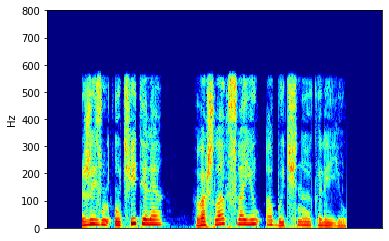

In [249]:
plot_spectr(signal)

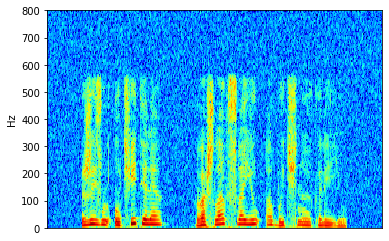

In [300]:
plot_spectr(signal + get_snr_noise(signal, 30))

In [261]:
sr = 22000
ipd.Audio(signal+get_snr_noise(signal, 20), rate=sr)

In [290]:
signal_one, sr = librosa.load(files[223])
signal_two, sr = librosa.load(files[1])

In [291]:
ipd.Audio(signal_two, rate=sr)

In [267]:
ipd.Audio(signal_one, rate=sr)

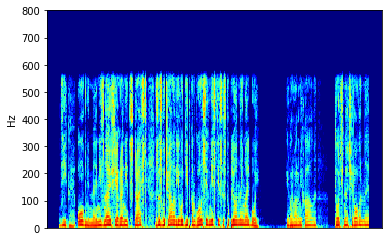

In [277]:
plot_spectr(signal_two)

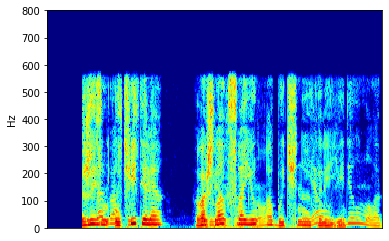

In [305]:
noise = get_snr_scaled_noise(signal_one, signal_two, 10)
mixed = mix_sounds(signal_one, noise)
plot_spectr(mixed)

In [306]:
ipd.Audio(mixed, rate=sr)